### 2. Get data

In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Train-Test-Split

In [3]:
X = df.drop('Survived', axis=1)
type(X) # feature matrix

pandas.core.frame.DataFrame

In [4]:
y = df['Survived']
type(y) # series 

pandas.core.series.Series

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y , random_state=42) # 

In [7]:
X_train.shape, y_train.shape

((712, 11), (712,))

In [8]:
X_test.shape, y_train.shape

((179, 11), (712,))

### 4. Explore data

#### 4.1 get an overview

In [9]:
print(
      '\n\n info\n', df.info(),
     '\n\nsummary stats\n', df.describe(),
     '\n\nmedian\n', df.median()
)

# df.shape and df.count() , df.std(), df.mean() etc. included

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 info
 None 

summary stats
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std

#### 4.1 explore missing value counts

In [10]:
# check where missing values are
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

#### 4.2 check value counts for certain columns

In [11]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

#### 4.3. check for correlations

In [12]:
# for all columns with numerical values
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
# calculate the number of surviving/non-surviving passengers
survivors = df[df['Survived']==1]
print('survivors', survivors['Survived'].count())

non_survivors = df[df['Survived']==0]
print('non survivors', non_survivors['Survived'].count())

survivors 342
non survivors 549


Text(0.5, 1.0, 'Number of surviving/non-surviving passengers')

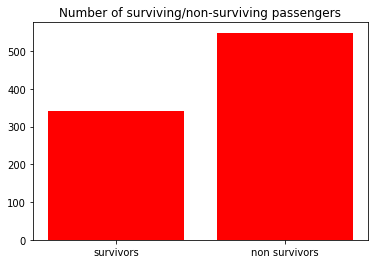

In [14]:
# display it as a barplot
import numpy as np
from matplotlib import pyplot as plt 
height = [survivors['Survived'].count(), non_survivors['Survived'].count()]
bars = ('survivors', 'non survivors')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color='red')
plt.xticks(y_pos, bars)
plt.title('Number of surviving/non-surviving passengers')

In [15]:
# calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
proportion = (df[(df.Survived ==1) & (df.Pclass ==1)].count())/(df[(df.Pclass ==1)].count())
print('proportion of surviving 1st class passengers:', proportion)

proportion of surviving 1st class passengers: PassengerId    0.629630
Survived       0.629630
Pclass         0.629630
Name           0.629630
Sex            0.629630
Age            0.655914
SibSp          0.629630
Parch          0.629630
Ticket         0.629630
Fare           0.629630
Cabin          0.664773
Embarked       0.626168
dtype: float64


male Pclass
1    122
2    108
3    347
Name: Pclass, dtype: int64 female Pclass
1     94
2     76
3    144
Name: Pclass, dtype: int64


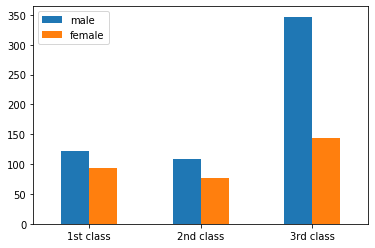

In [16]:
# create a bar plot with seperate bars for male/female passengers and 1st/2nd/3rd class 

# count male and females per passenger class
male_count = df[df['Sex']=='male'].groupby(["Pclass"])["Pclass"].count()
female_count = df[df['Sex']=='female'].groupby(["Pclass"])["Pclass"].count()
print('male', male_count, 'female', female_count)

male_count = male_count.to_list()
female_count = female_count.to_list()
index = ['1st class', '2nd class', '3rd class']

plot_df = pd.DataFrame({'male': male_count,
                    'female': female_count}, index=index)
ax = plot_df.plot.bar(rot=0)


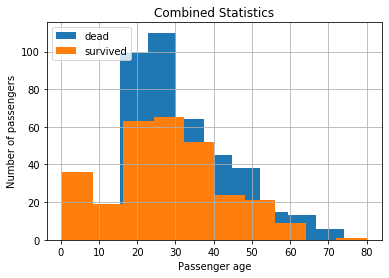

In [17]:
df['Age'].groupby(by=df["Survived"]).hist()

plt.title('age distribution of passengers comparing surviving/non-surviving passengers')
plt.title("Combined Statistics")
plt.xlabel("Passenger age")
plt.ylabel("Number of passengers")
labels=['dead','survived']
plt.legend(labels=labels,loc="upper left")

In [18]:
# calculate the average age fur survived and drowned passengers

average_age_survived = df[df['Survived']==1]['Age'].mean()
average_age_drowned = df[df['Survived']==0]['Age'].mean()

print('average_age_survived: ', average_age_survived, 
      '\naverage_age_drowned:', average_age_drowned)


average_age_survived:  28.343689655172415 
average_age_drowned: 30.62617924528302


In [19]:
# create a table counting the number of surviving/dead passengers separately
# for 1st/2nd/3rd class and male/female

import numpy as np
# create a subset
df_sub = df[['Survived', 'Pclass', 'Sex']]

# transform survived col to boolean
df['Survived'] = df['Survived'].astype(bool)

# create a dead passenger column
df_sub['Dead'] = np.logical_xor(df['Survived'],1)

# groupby subset by passenger class and sex and apply aggregation function to the groups  
df_sub.groupby(["Pclass", 'Sex']).sum().astype(int)

/Users/lara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Survived  Dead
Pclass Sex                   
1      female        91     3
       male          45    77
2      female        70     6
       male          17    91
3      female        72    72
       male          47   300

### 5. Feature Engineering

####  5.1 Function

In [37]:
# for columns that make sense to use as feature input for the model 

#sub_df = df[['Survived', 'Pclass', 'Age', 'Sex']]
sub_df = df.loc[:,('Survived', 'Pclass', 'Age', 'Sex')]

# turn sex values into numerical
sub_df.replace({'Sex': {'male': 1, 'female':0 }}, inplace=True)
sub_df.corr()
# try pclass and age as interaction term

,Survived,Pclass,Age,Sex
Survived,1.000000,-0.338481,-0.077221,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.131900
Age,-0.077221,-0.369226,1.000000,0.093254
Sex,-0.543351,0.131900,0.093254,1.000000


In [24]:
def feature_engineer(df): # take any dataframe, no matter if test or train
        # select relevant features
        df_sub = df[['Age', 'Pclass', 'Sex']] 
        
        # make Sex numerical and put it into two columns 
        sex_binary_df = pd.get_dummies(df_sub['Sex'], drop_first=True)        
        
        # one hot-encoding of passenger class
        pclass_binary_df = pd.get_dummies(df_sub['Pclass'], prefix='Pclass')
        pclass_binary_df = pclass_binary_df.drop('Pclass_3', axis=1)
        
        # fill na in age col with the mean of the column
        df_age = pd.DataFrame(df_sub['Age'].fillna(df_sub['Age'].mean()))
        # join with the age column 
        df_fe = pd.DataFrame(df_age.join([sex_binary_df, pclass_binary_df], how='left'))
        
        # add interaction term (Pclass and Age)
        # df_fe['Pclass_1_Age_interact'] = df_fe['Pclass_1'] * df_fe['Age']
      b  # df_fe['Pclass_2_Age_interact'] = df_fe['Pclass_2'] * df_fe['Age']
        # not used -> only increases training acc. in rf, but decreases test acc. 
        
        # add interaction term (Pclass and Sex)
        df_fe['Pclass_1_sex_interact'] = df_fe['Pclass_1'] * df_fe['male']
        df_fe['Pclass_2_sex_interact'] = df_fe['Pclass_2'] * df_fe['male']
        # -> improves the test accuracy for linear regression!
        
        return df_fe

In [27]:
X_train_fe = feature_engineer(X_train)

#### 5.2 Scaling

In [28]:
# scaling with min max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_fe) # memorizes the min and max for each column, no y 
X_train_fe_scaled_m = scaler.transform(X_train_fe) # does the actual scaling; still no y
X_train_fe_scaled_m  # numpy array

array([[0.36928483, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.36928483, 1.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.36928483, 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.59788892, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.58532295, 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [0.36928483, 1.        , 1.        , 0.        , 1.        ,
        0.        ]])

In [29]:
# scaling with standard scaler
from sklearn.preprocessing import StandardScaler
m = StandardScaler()
X_train_fe_scaled_std = m.fit_transform(X_train_fe)
X_train_fe_scaled_std

array([[-5.46322934e-16,  7.42427274e-01, -5.62211109e-01,
        -5.16627443e-01, -3.85210458e-01, -3.85210458e-01],
       [-5.46322934e-16,  7.42427274e-01, -5.62211109e-01,
         1.93563082e+00, -3.85210458e-01,  2.59598352e+00],
       [-5.46322934e-16,  7.42427274e-01,  1.77869129e+00,
        -5.16627443e-01,  2.59598352e+00, -3.85210458e-01],
       ...,
       [ 1.39877270e+00, -1.34693328e+00, -5.62211109e-01,
        -5.16627443e-01, -3.85210458e-01, -3.85210458e-01],
       [ 1.32188459e+00,  7.42427274e-01,  1.77869129e+00,
        -5.16627443e-01,  2.59598352e+00, -3.85210458e-01],
       [-5.46322934e-16,  7.42427274e-01,  1.77869129e+00,
        -5.16627443e-01,  2.59598352e+00, -3.85210458e-01]])

### 6. Train Model

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
m_1 = LogisticRegression() # inverse of the regularization strength C=1

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
m_2 = DecisionTreeClassifier(max_depth=4, random_state=14)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
m_3 = RandomForestClassifier(n_estimators=1200, max_depth=5, random_state=42)

In [66]:
# fit the models on X_train_de and y_train
m_1.fit(X_train_fe, y_train)
m_2.fit(X_train_fe, y_train)
m_3.fit(X_train_fe, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
# training accuracy for Logistic Regression
print(m_1.score(X_train_fe, y_train))
# training acc history: 
# predictors Sex and Pclass: 0.787
# next including age:        0.79775
# with binning of age column into 8 bins 0.796 -> detailled age information is needed
# with minmax scaling        0.790
# with standard scaler:      0.794 
acc = m_1.score(X_train_fe, y_train)  # calculates an accuracy
print(f"{acc.round(5) * 100}% accuracy")

0.7921348314606742
79.213% accuracy


In [68]:
# inspect coefficients and intercept
print(m_1.coef_ , m_1.intercept_)

[[-0.03458668 -1.97390129  2.78403761  1.86562204 -0.9926062  -1.52336649]] [1.01006074]


In [69]:
# calculate probabilities
m_1.predict_proba(X_train_fe[:5])

array([[0.88024892, 0.11975108],
       [0.83923322, 0.16076678],
       [0.55066503, 0.44933497],
       [0.40431914, 0.59568086],
       [0.14142606, 0.85857394]])

In [70]:
# Decision Tree training accuracy
m_2.score(X_train_fe, y_train) 

# max_depth = 2 : 0.799 ->  0.002 better than logistic regression! 
# max_depth = 4:  0.813
# max_depth = 10:  0.863
# no hyperparameters set: 0.877 overfitted?
# with interaction term age-pclass: 0.817
# with interaction term sex-pclass: 0.813

0.8188202247191011

In [71]:
# Random Forest training accuracy
m_3.score(X_train_fe, y_train) 

0.8384831460674157

### 7.1 Optimize/ Cross-Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
# for model 1
cross_val_result_m1 = cross_val_score(m_1, X_train_fe, y_train, cv=10, scoring='accuracy')
cross_val_result_m1

array([0.73611111, 0.80555556, 0.8028169 , 0.70422535, 0.8028169 ,
       0.81690141, 0.81690141, 0.8028169 , 0.81690141, 0.8028169 ])

In [74]:
# look at the average accuracy and compare it to the score on the training data
cross_val_result_m1.mean()

0.7907863849765259

In [75]:
cross_val_result_m1.std()

0.0365037573928397

### 7.2 Overfit deliberately

In [76]:
# Decision Tree
cross_val_score(m_2, X_train_fe, y_train).mean()
# no overfitting

0.8062346104599627

In [77]:
# Random Forest
cross_val_score(m_3, X_train_fe, y_train, cv=5).mean()

0.8062641583768345

In [78]:
m_3.feature_importances_

array([0.24071398, 0.45345843, 0.14744864, 0.07262026, 0.0468396 ,
       0.03891908])

### 8. Calculate Test Score

In [79]:
# run feature engineering on test data
X_test_fe = feature_engineer(X_test)

In [80]:
# optinal scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_test_fe) # memorizes the min and max for each column, no y 
X_test_fe_scaled_m = scaler.transform(X_test_fe)


In [81]:
# run test score function
# Logistic Regression
m_1.score(X_test_fe, y_test)

# test score history:
# 0.793 with minmax scaling
# 0.804 without any scaling 
# 0.821 with interaction term sex-pclass

0.776536312849162

In [82]:
# Decision Tree
m_2.score(X_test_fe, y_test)
# max depth = 6: 0.759
# max depth = 2: 0.782
# max depth = 4: 0.810
# with interaction term age-pclass: 0.804 only increases acc in the training set 
# with interaction term sex-pclass: 0.810

0.7653631284916201

In [83]:
# Random Forest
m_3.score(X_test_fe, y_test)

0.7821229050279329

### Plot decision tree

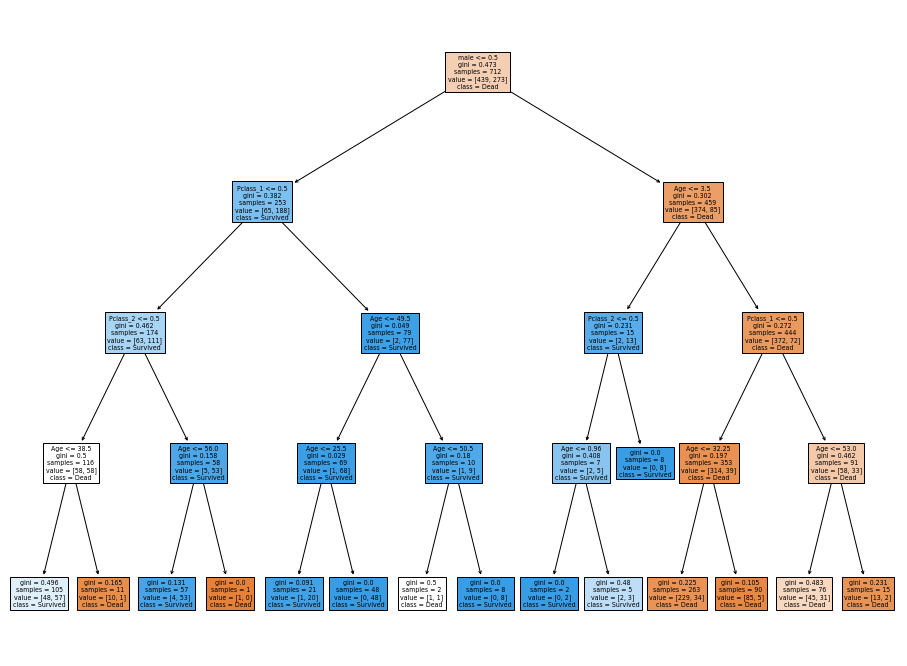

In [244]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 12))
t = plot_tree(m_2, feature_names = ["Age", "male", "Pclass_1", "Pclass_2"], class_names=["Dead", "Survived"], filled=True)

### Submit it to Kaggle 

In [248]:
# make predictions 

In [252]:
new_passengers_df = pd.read_csv("predict.csv")
new_passengers_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [253]:
X_new = feature_engineer(new_passengers_df)



In [256]:
m_3.predict(X_new)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [258]:
new_passengers_df["Survived"] = m_3.predict(X_new)
submission_df = new_passengers_df.drop(["Name", "Age", "Sex", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Pclass"], axis=1)

In [259]:
submission_df.to_csv('submission_rf_kaggle.csv', index=False)

### Save the model

In [35]:
X_train_fe = feature_engineer(X_train)
X_train_fe.head(4)

,Age,male,Pclass_1,Pclass_2,Pclass_1_sex_interact,Pclass_2_sex_interact
692,29.807687,1,0,0,0,0
481,29.807687,1,0,1,0,1
527,29.807687,1,1,0,1,0
855,18.000000,0,0,0,0,0


In [175]:
import pickle
pickle.dump(m_3, open('titanic_random_forest_model.m', 'wb'))  # <-- saves model to a binary file

### Load the model

In [580]:
m3 = pickle.load(open('titanic_random_forest_model.m', 'rb'))